# K-Nearest-Neighbors Breast Cancer Classifier

Hi, everyone. In this notebook, we will be using a breast cancer dataset sourced from the SciKit Learn library to predict whether or not certain tumors are malignant or benign, and therefore indicative of breast cancer or not. More importantly we will be exploring the K-Nearest-Neighbors machine learning model to do this, determining how we can optimize the model to produce the most accurate results for ourselves.

Let's first import the required dependencies, including the dataset itself:

In [3]:
import seaborn as sns
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Next, let's load the dataset onto a dataframe:

In [4]:
breast_cancer_data = load_breast_cancer()

Since this data comes straight from SciKitLearn's library, there's no need for us to clean the data. We will, however, need to split the data into training and testing sets. Sklearn's train_test_split method comes in handy for this:

In [5]:
train_data, val_data, train_labels, val_labels = train_test_split(breast_cancer_data.data,
                                                                  breast_cancer_data.target,
                                                                  test_size = 0.2, random_state = 100)

As you can see, I performed an 80/20 split on the data. That is, 80% of the data will be used to train the model, while 20% will be used to test the model. I set a random state on the data as well, as that allows the data to be split the same way every time.

Now, as you may already know, the accuracy of a KNN model depends largely on the value you select for k. Make your k-value too small, and your model will fall victim to outliers. Make your k-value too large and your model will overfit to the data, and will therefore have a poor out-of-sample accuracy.

So how do we know which value of k is optimal? We can use a for-loop! We can simply run the KNN algorithm starting with a k-value of 1 inside of a for-loop, incrementing k by a value of 1 every time the loop repeats. We can calculate the accuracy attained by each value of k and append it to an empty list, which we can graph and analyze at the end.

This is our empty list of accuracies:

In [6]:
accuracies = []

This is our loop, which will run through 100 values of k ranging from 1-100:

In [7]:
for k in range(1, 101):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(train_data, train_labels)
  accuracies.append(classifier.score(val_data, val_labels))

We can now graph the list of accuracies against each value of k that it corrresponds with:

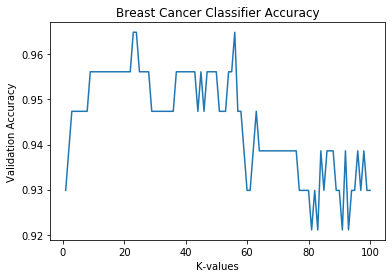

In [8]:
k_list = range(1, 101)

plt.plot(k_list, accuracies)
plt.xlabel('K-values')
plt.ylabel('Validation Accuracy')
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

Nice. It looks like we obtain the best validation accuracy with k being somewhere either in the low 20s, or in the high 50s. Let's get the max accuracy value from the accuracies list to obtain the single best value for k:

In [15]:
print('optimal k =', accuracies.index(max(accuracies)))

optimal k = 22


And there we are. We have found an optimal value for our machine learning model. This concludes the notebook!